# Import Files

In [47]:
# ! pip install numpy pmdarima openpyxl

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16,8
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima.utils import ndiffs

In [48]:
df = pd.read_excel('forecastfile.xlsx')

In [49]:
df

,month,quantity
0,2016-04-01,810300
1,2016-05-01,875150
2,2016-06-01,809100
3,2016-07-01,695500
4,2016-08-01,774400
...,...,...
70,2022-02-01,903800
71,2022-03-01,1305500
72,2022-04-01,1233350
73,2022-05-01,1382850


In [50]:
df.describe()

,quantity
count,7.500000e+01
mean,8.963363e+05
std,2.422337e+05
min,9.400000e+03
25%,7.710500e+05
50%,8.751500e+05
75%,1.017650e+06
max,1.450030e+06


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   month     75 non-null     datetime64[ns]
 1   quantity  75 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.3 KB


In [52]:
df['month'] = pd.to_datetime(df['month'], infer_datetime_format=True)
dfi = df.set_index(['month'])
dfi

,quantity
month,
2016-04-01,810300
2016-05-01,875150
2016-06-01,809100
2016-07-01,695500
2016-08-01,774400
...,...
2022-02-01,903800
2022-03-01,1305500
2022-04-01,1233350


In [53]:
dfi.describe()

,quantity
count,7.500000e+01
mean,8.963363e+05
std,2.422337e+05
min,9.400000e+03
25%,7.710500e+05
50%,8.751500e+05
75%,1.017650e+06
max,1.450030e+06


In [54]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 75 entries, 2016-04-01 to 2022-06-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   quantity  75 non-null     int64
dtypes: int64(1)
memory usage: 1.2 KB


In [55]:
ndiffs(dfi.quantity, test='adf')

1

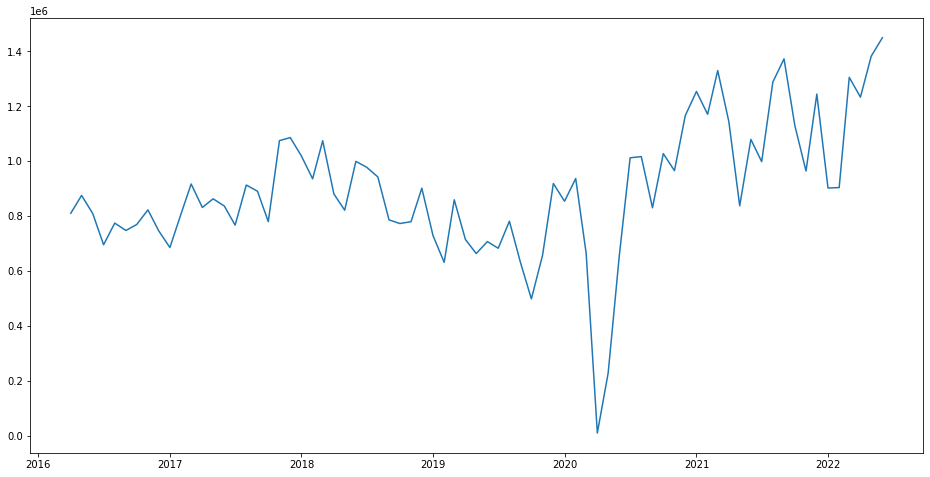

In [56]:
plt.plot(dfi)
plt.show()

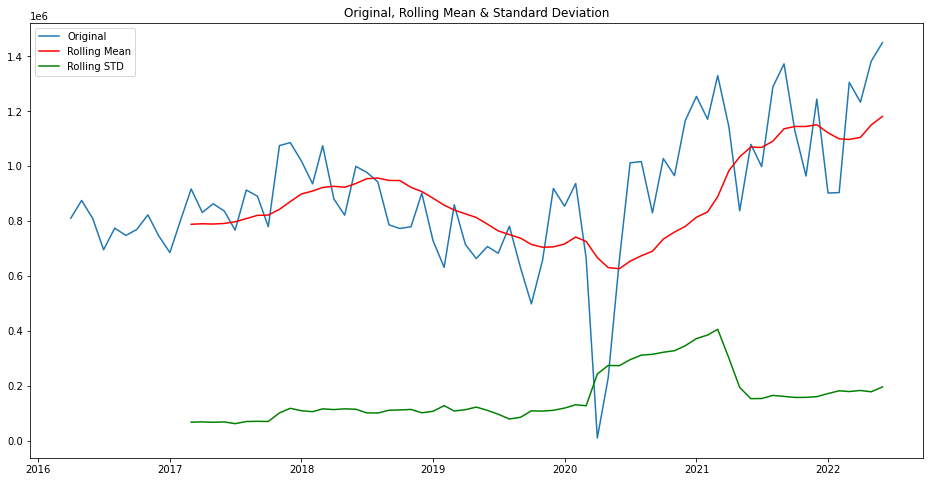

In [57]:
rmean = dfi.rolling(window=12).mean()
rstd = dfi.rolling(window=12).std()
plt.plot(dfi, label='Original')
plt.plot(rmean, color='r', label='Rolling Mean')
plt.plot(rstd, color='g', label='Rolling STD')
plt.title('Original, Rolling Mean & Standard Deviation')
plt.legend()
plt.show()

In [58]:
print('Results of Dickey-Fuller Test:')
dfitst = adfuller(dfi, autolag='AIC')
dfiop = pd.Series(dfitst[0:4], index=['Test Statistic:', 'p-value:', '#Lags Used:', '#Datapoints Used:'])

for key,value in dfitst[4].items():
    dfiop['Critical Value (%s)'%key] = value

print(dfiop)

Results of Dickey-Fuller Test:
Test Statistic:         -1.092387
p-value:                 0.718098
#Lags Used:              4.000000
#Datapoints Used:       70.000000
Critical Value (1%)     -3.527426
Critical Value (5%)     -2.903811
Critical Value (10%)    -2.589320
dtype: float64


In [59]:
dfi1 = dfi['quantity'] - dfi['quantity'].shift(1)
dfi1

month
2016-04-01         NaN
2016-05-01     64850.0
2016-06-01    -66050.0
2016-07-01   -113600.0
2016-08-01     78900.0
                ...   
2022-02-01      1575.0
2022-03-01    401700.0
2022-04-01    -72150.0
2022-05-01    149500.0
2022-06-01     67180.0
Name: quantity, Length: 75, dtype: float64

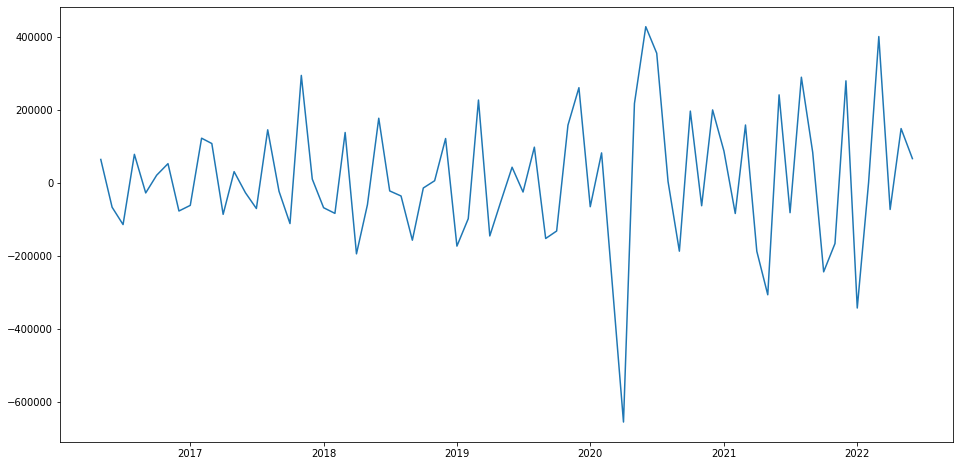

In [60]:
plt.plot(dfi1)
plt.show()

In [61]:
print('Results of Dickey-Fuller Test:')
dfitst = adfuller(dfi1.dropna(), autolag='AIC')
dfiop = pd.Series(dfitst[0:4], index=['Test Statistic:', 'p-value:', '#Lags Used:', '#Datapoints Used:'])

for key,value in dfitst[4].items():
    dfiop['Critical Value (%s)'%key] = value

print(dfiop)

Results of Dickey-Fuller Test:
Test Statistic:        -7.492494e+00
p-value:                4.467356e-11
#Lags Used:             3.000000e+00
#Datapoints Used:       7.000000e+01
Critical Value (1%)    -3.527426e+00
Critical Value (5%)    -2.903811e+00
Critical Value (10%)   -2.589320e+00
dtype: float64


In [62]:
from statsmodels.graphics.tsaplots import plot_acf

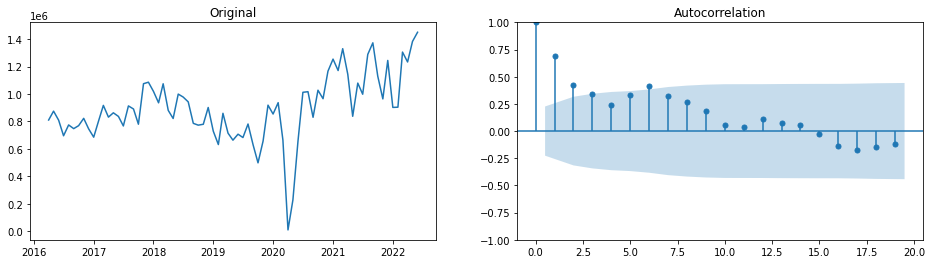

In [63]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(dfi)
ax1.set_title('Original')
plot_acf(dfi, ax=ax2);

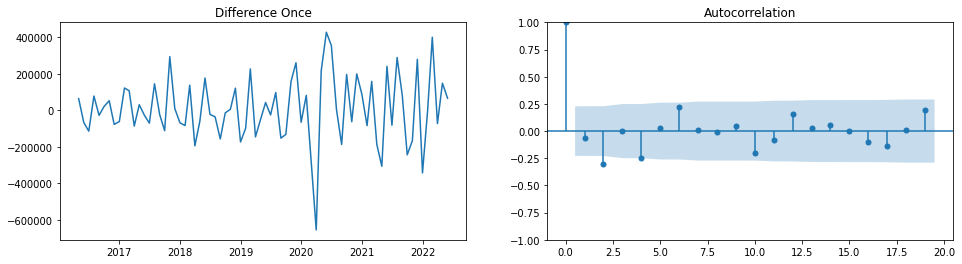

In [64]:
dfi2=dfi.quantity.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(dfi2)
ax1.set_title('Difference Once')
plot_acf(dfi2, ax=ax2);

In [65]:
from statsmodels.graphics.tsaplots import plot_pacf

/usr/local/Caskroom/miniforge/base/envs/test_env/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


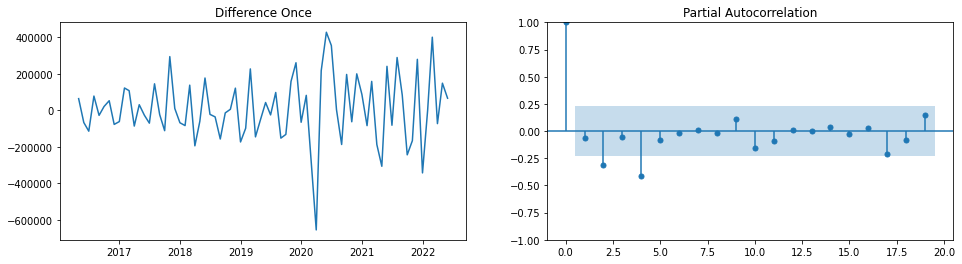

In [66]:
dfi2=dfi.quantity.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(dfi2)
ax1.set_title('Difference Once')
ax2.set_ylim(0,1)
plot_pacf(dfi2, ax=ax2);

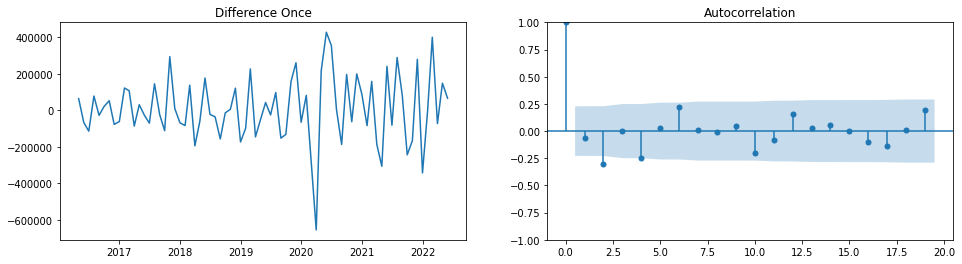

In [67]:
dfi2=dfi.quantity.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(dfi2)
ax1.set_title('Difference Once')
ax2.set_ylim(0,1)
plot_acf(dfi2, ax=ax2);

# Fitting the ARIMA MODEL

In [68]:
from statsmodels.tsa.arima.model import ARIMA

In [69]:
#ARIMA MODEL

model = ARIMA(dfi.quantity, order=(2,1,2))
result = model.fit()


/usr/local/Caskroom/miniforge/base/envs/test_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/Caskroom/miniforge/base/envs/test_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/Caskroom/miniforge/base/envs/test_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [70]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:               quantity   No. Observations:                   75
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -994.448
Date:                Wed, 17 Aug 2022   AIC                           1998.895
Time:                        16:55:21   BIC                           2010.416
Sample:                    04-01-2016   HQIC                          2003.491
                         - 06-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0435      0.352     -0.124      0.902      -0.734       0.646
ar.L2          0.1445      0.297      0.487      0.626      -0.437       0.726
ma.L1         -0.0768      0.273     -0.281      0.7

(array([9.39749728e-08, 9.39749728e-08, 3.75899891e-07, 1.31564962e-06,
        2.81924918e-06, 1.69154951e-06, 5.63849837e-07, 0.00000000e+00,
        0.00000000e+00, 9.39749728e-08]),
 array([-608517.47216629, -466635.72494966, -324753.97773303,
        -182872.2305164 ,  -40990.48329977,  100891.26391686,
         242773.01113348,  384654.75835011,  526536.50556674,
         668418.25278337,  810300.        ]),
 <BarContainer object of 10 artists>)

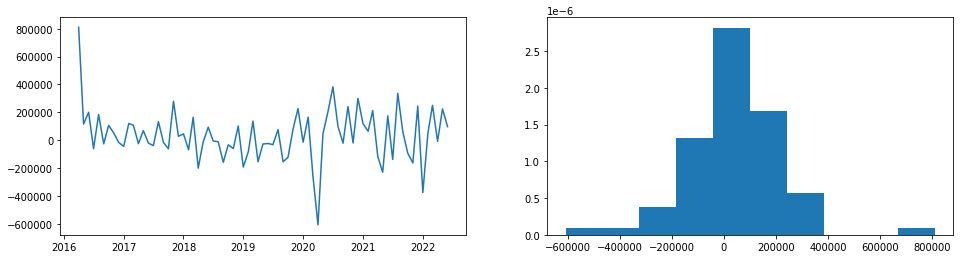

In [71]:
# Plot residual Errors
residuals = pd.DataFrame(result.resid)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,4))

ax1.plot(residuals)
ax2.hist(residuals, density=True)


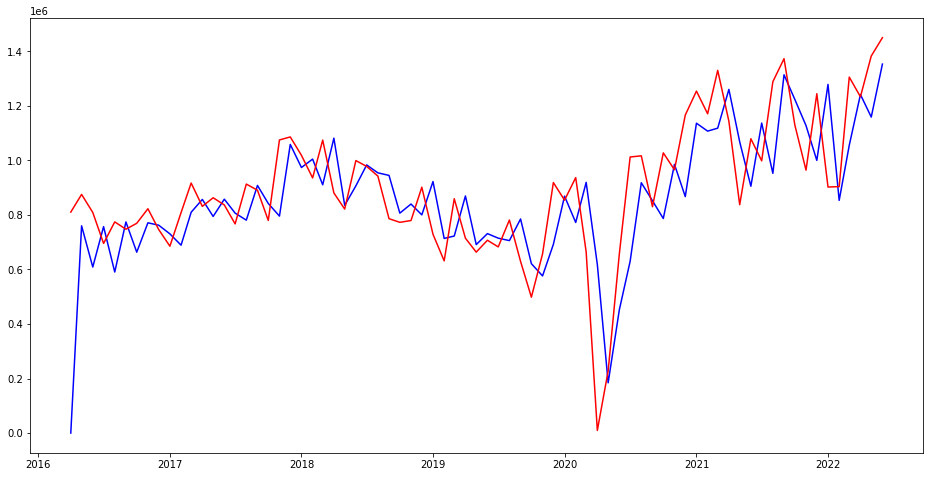

In [72]:
#Acutal vs Fitted

# result.plot_predict(dynamic=False)

prediction = result.predict()
plt.plot(prediction, color='blue')
plt.plot(dfi, color='red')


In [73]:
prediction

2016-04-01    0.000000e+00
2016-05-01    7.600223e+05
2016-06-01    6.088777e+05
2016-07-01    7.570242e+05
2016-08-01    5.905852e+05
                  ...     
2022-02-01    8.532399e+05
2022-03-01    1.055513e+06
2022-04-01    1.241503e+06
2022-05-01    1.158938e+06
2022-06-01    1.353175e+06
Freq: MS, Name: predicted_mean, Length: 75, dtype: float64